# Pyber

The ride sharing bonanza continues! Seeing the success of notable players like Uber and Lyft, you've decided to join a fledgling ride sharing company of your own. In your latest capacity, you'll be acting as Chief Data Strategist for the company. In this role, you'll be expected to offer data-backed guidance on new opportunities for market differentiation.

You've since been given access to the company's complete recordset of rides. This contains information about every active driver and historic ride, including details like city, driver count, individual fares, and city type.

Your objective is to build a [Bubble Plot](https://en.wikipedia.org/wiki/Bubble_chart) that showcases the relationship between four key variables:

* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In addition, you will be expected to produce the following three pie charts:

* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")

In [93]:
city_df = pd.read_csv('raw_data/city_data.csv')
city_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [95]:
ride_df = pd.read_csv('raw_data/ride_data.csv')
ride_df.head()

,city,date,fare,ride_id
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673


In [78]:
merged_df = city_df.merge(ride_df,on='city')
merged_df.head()
city_group = merged_df.groupby('city')
#fare total per driver
city_group['fare'].sum() / city_group['driver_count'].mean()
#avg fare
avg_fare = city_group['fare'].mean()
num_rides = city_group['fare'].count()
num_drivers = city_group['driver_count'].mean()

num_rides.max()

64

In [79]:
#city_type = (city_df.set_index('city'))['type'].sort_index()
city_type = city_group['type'].max()
#city_type.unique()

mapping = {'Urban': 'Gold', 'Suburban': 'blue', 'Rural': 'pink' }
city_type_color = city_type.map(mapping)

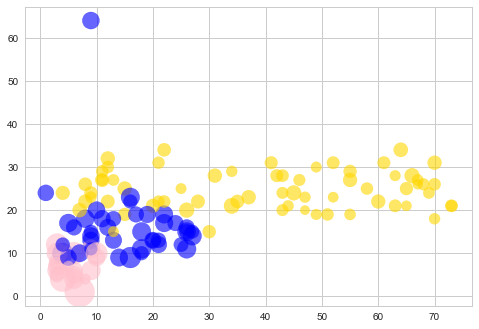

In [89]:
plt.scatter(num_drivers,num_rides, s=(avg_fare**2.5)/avg_fare.min(), alpha = .6, color = city_type_color)

plt.show()

# Pie Charts
* % of Total Fares by City Type
* % of Total Rides by City Type
* % of Total Drivers by City Type

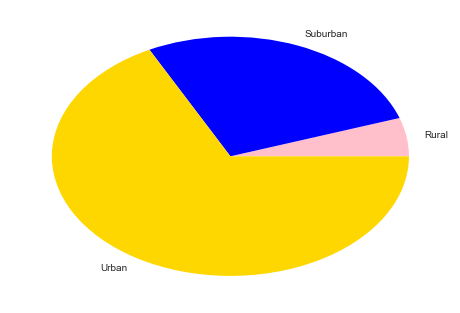

type
Rural        125
Suburban     657
Urban       1625
Name: fare, dtype: int64

In [70]:
type_group = merged_df.groupby('type')

plt.pie(type_group['fare'].count(), colors = ('pink', 'blue', 'Gold'), labels=('Rural', 'Suburban', 'Urban'), )
plt.show()
type_group['fare'].count()